 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [3]:
df.head(20)

Stationcode                                         Locations        Lat  \
0          1001                                BEAS AT U/S MANALI  32.244947   
1          1002                                  BEAS AT D/S KULU  31.960582   
2          1003                                   BEAS AT D/S AUT  26.887893   
3          1004                            BEAS AT U/S PANDON DAM  47.351943   
4          1005          BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE  25.992786   
5          1550                                         U/S MANDI  31.708165   
6          1006                                 BEAS AT D/S MANDI  31.708165   
7          2604                           BEAS AT D/S JAISINGHPUR  31.899643   
8          1007                               BEAS AT D/S ALAMPUR  15.884349   
9          1008                          BEAS AT D/S DEHRAGOPIPUR  31.881756   
10         1009                              BEAS AT D/S PONG DAM  31.976579   
11         1693                               BEAS AT TALWARA H/W  31.931129   
12         1694                                     U/S PATHANKOT  32.264338   
13         1695                                     U/S PATHANKOT  32.264338   
14         1010                 BEAS AT MIRTHAL BRIDGE, GURDASPUR  31.940009   
15         1294  BEAS AT 1KM.D/S OF EFFL. DISH. POINT AT MUKERIAN  31.940009   
16         1011       BEAS AT G.T.ROAD UNDER BDG. NEAR KAPURTHALA  31.371480   
17         1696                                      U/S GOINDWAL  31.363840   
18         1012         BEAS AT 100M D/S INDUST. DISCH. GOINDWAL   31.363840   
19         1697                                    BEAS AT HARIKE  31.170000   

          Lon Capitalcity             State  Temperature   D.O   pH  \
0   77.191080      Shimla  HIMACHAL PRADESH          9.0   9.0  8.0   
1   77.114009      Shimla  HIMACHAL PRADESH         10.0   9.0  8.0   
2   75.811484      Shimla  HIMACHAL PRADESH         11.0   9.0  8.0   
3   19.633621      Shimla  HIMACHAL PRADESH         13.0   9.0  8.0   
4   91.826111      Shimla  HIMACHAL PRADESH         14.0  10.0  8.0   
5   76.931367      Shimla  HIMACHAL PRADESH         16.0   9.0  8.0   
6   76.931367      Shimla  HIMACHAL PRADESH         16.0   9.0  8.0   
7   76.597945      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
8   78.119382      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
9   76.214645      Shimla  HIMACHAL PRADESH         19.0   8.0  8.0   
10  76.050795      Shimla  HIMACHAL PRADESH         20.0   8.0  8.0   
11  75.894059  Chandigarh            PUNJAB         15.0   8.0  8.0   
12  75.642112  Chandigarh            PUNJAB         18.0   7.0  8.0   
13  75.642112  Chandigarh            PUNJAB         15.0   7.0  7.0   
14  75.247906  Chandigarh            PUNJAB         15.0   8.0  8.0   
15  75.247906  Chandigarh            PUNJAB         14.0   7.0  7.0   
16  75.393681  Chandigarh            PUNJAB         14.0   7.0  7.0   
17  75.137025  Chandigarh            PUNJAB         16.0   7.0  7.0   
18  75.137025  Chandigarh            PUNJAB         17.0   7.0  7.0   
19  75.200000  Chandigarh            PUNJAB         16.0   7.0  8.0   

   Conductivity  B.O.D Nitrate Fecalcaliform  Totalcaliform class  
0            85   0.10     0.2           106          397.0   yes  
1           102   0.30     0.4           153          954.0   yes  
2            96   0.20     0.3            58          653.0   yes  
3            94   0.20     0.4            34          317.0   yes  
4           112   0.20     0.5           213         1072.0   yes  
5           117   0.20     0.5           100          722.0   yes  
6           155   0.50     0.7           445         1855.0   yes  
7           211   0.50     0.5             7           72.0   yes  
8           202   0.60     0.4             9          123.0   yes  
9           280   0.70     1.1            10          157.0   yes  
10          177   0.50     0.4             7           92.0   yes  
11          285

In [4]:
df.shape

(1361, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [6]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(967, 15)

In [9]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [11]:
cndt = df['Conductivity']

In [12]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [13]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [14]:
nitr = df['Nitrate']

In [15]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [16]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [17]:
fclf = df['Fecalcaliform']

In [18]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [19]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [21]:
df.describe()

Stationcode         Lat         Lon  Temperature         D.O  \
count   967.000000  967.000000  967.000000   967.000000  967.000000   
mean   1899.374354   20.970569   78.364700    25.355714    6.891423   
std     706.222881    6.459671    6.894196     4.413136    1.674220   
min       4.000000    8.388518   19.633621     5.000000    0.000000   
25%    1326.500000   17.000538   74.970558    24.000000    6.200000   
50%    1960.000000   21.007658   76.852727    26.458333    7.091667   
75%    2515.500000   26.234941   80.964831    27.908333    7.750000   
max    3029.000000   47.351943   95.999123    37.500000   30.366667   

               pH  Conductivity       B.O.D     Nitrate  Fecalcaliform  \
count  967.000000    967.000000  967.000000  967.000000   9.670000e+02   
mean     7.668664   1323.534458    3.738066    5.075913   1.773840e+05   
std      0.478087   3703.988886    8.546417   30.069937   3.792506e+06   
min      5.200000     25.250000    0.000000    0.000000   1.400000e+00   
25%      7.450000    201.500000    1.021250    0.304167   1.579167e+01   
50%      7.788333    388.000000    2.091667    0.800000   1.441667e+02   
75%      8.000000    754.333333    3.936667    2.000000   8.245833e+02   
max      9.575000  36593.000000  158.750000  640.000000   1.100000e+08   

       Totalcaliform  
count   9.670000e+02  
mean    5.361407e+05  
std     1.015845e+07  
min     5.000000e-03  
25%     5.000000e+01  
50%     4.650000e+02  
75%     1.746665e+03  
max     2.500000e+08

In [22]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [23]:
df_new['class'] = df_new['class'] == 'yes'

In [24]:
df_new.head()

Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Fecalcaliform  \
0          9.0   9.0  8.0          85.0    0.1      0.2          106.0   
1         10.0   9.0  8.0         102.0    0.3      0.4          153.0   
2         11.0   9.0  8.0          96.0    0.2      0.3           58.0   
3         13.0   9.0  8.0          94.0    0.2      0.4           34.0   
4         14.0  10.0  8.0         112.0    0.2      0.5          213.0   

   Totalcaliform  class  
0          397.0   True  
1          954.0   True  
2          653.0   True  
3          317.0   True  
4         1072.0   True

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [26]:
df_new.corr()

Temperature       D.O        pH  Conductivity     B.O.D  \
Temperature       1.000000 -0.137697 -0.062000      0.132268  0.059620   
D.O              -0.137697  1.000000  0.194636     -0.092865 -0.280783   
pH               -0.062000  0.194636  1.000000     -0.008232 -0.004717   
Conductivity      0.132268 -0.092865 -0.008232      1.000000  0.164644   
B.O.D             0.059620 -0.280783 -0.004717      0.164644  1.000000   
Nitrate           0.026301  0.011558 -0.147210     -0.008017  0.004074   
Fecalcaliform    -0.013133 -0.165299  0.008265     -0.003694  0.053959   
Totalcaliform    -0.013379 -0.182276  0.009426     -0.003406  0.063619   
class            -0.162458 -0.147469 -0.298328      0.069188  0.047831   

                Nitrate  Fecalcaliform  Totalcaliform     class  
Temperature    0.026301      -0.013133      -0.013379 -0.162458  
D.O            0.011558      -0.165299      -0.182276 -0.147469  
pH            -0.147210       0.008265       0.009426 -0.298328  
Conductivity  -0.008017      -0.003694      -0.003406  0.069188  
B.O.D          0.004074       0.053959       0.063619  0.047831  
Nitrate        1.000000      -0.005780      -0.006528  0.005181  
Fecalcaliform -0.005780       1.000000       0.848463  0.024510  
Totalcaliform -0.006528       0.848463       1.000000  0.027741  
class          0.005181       0.024510       0.027741  1.000000

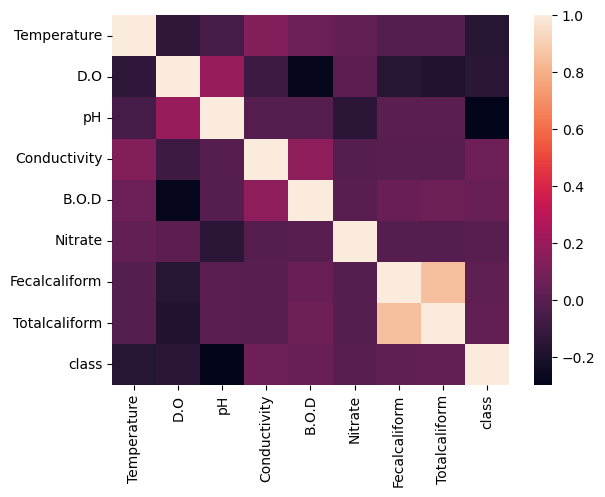

In [27]:
sns.heatmap(df_new.corr());

In [28]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [29]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [30]:
df_new['class'] = df_new['class'] == 'yes'

In [31]:
df_new.head()

Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Fecalcaliform  \
0          9.0   9.0  8.0          85.0    0.1      0.2          106.0   
1         10.0   9.0  8.0         102.0    0.3      0.4          153.0   
2         11.0   9.0  8.0          96.0    0.2      0.3           58.0   
3         13.0   9.0  8.0          94.0    0.2      0.4           34.0   
4         14.0  10.0  8.0         112.0    0.2      0.5          213.0   

   Totalcaliform  class  
0          397.0   True  
1          954.0   True  
2          653.0   True  
3          317.0   True  
4         1072.0   True

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [33]:
df_new.corr()

Temperature       D.O        pH  Conductivity     B.O.D  \
Temperature       1.000000 -0.137697 -0.062000      0.132268  0.059620   
D.O              -0.137697  1.000000  0.194636     -0.092865 -0.280783   
pH               -0.062000  0.194636  1.000000     -0.008232 -0.004717   
Conductivity      0.132268 -0.092865 -0.008232      1.000000  0.164644   
B.O.D             0.059620 -0.280783 -0.004717      0.164644  1.000000   
Nitrate           0.026301  0.011558 -0.147210     -0.008017  0.004074   
Fecalcaliform    -0.013133 -0.165299  0.008265     -0.003694  0.053959   
Totalcaliform    -0.013379 -0.182276  0.009426     -0.003406  0.063619   
class            -0.162458 -0.147469 -0.298328      0.069188  0.047831   

                Nitrate  Fecalcaliform  Totalcaliform     class  
Temperature    0.026301      -0.013133      -0.013379 -0.162458  
D.O            0.011558      -0.165299      -0.182276 -0.147469  
pH            -0.147210       0.008265       0.009426 -0.298328  
Conductivity  -0.008017      -0.003694      -0.003406  0.069188  
B.O.D          0.004074       0.053959       0.063619  0.047831  
Nitrate        1.000000      -0.005780      -0.006528  0.005181  
Fecalcaliform -0.005780       1.000000       0.848463  0.024510  
Totalcaliform -0.006528       0.848463       1.000000  0.027741  
class          0.005181       0.024510       0.027741  1.000000

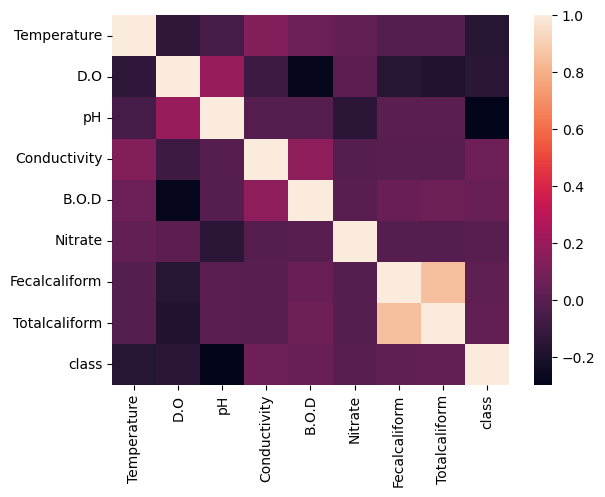

In [34]:
sns.heatmap(df_new.corr());

In [35]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [36]:
X.head()

Temperature   D.O   pH  Conductivity  B.O.D  Nitrate  Totalcaliform
0          9.0   9.0  8.0          85.0    0.1      0.2          397.0
1         10.0   9.0  8.0         102.0    0.3      0.4          954.0
2         11.0   9.0  8.0          96.0    0.2      0.3          653.0
3         13.0   9.0  8.0          94.0    0.2      0.4          317.0
4         14.0  10.0  8.0         112.0    0.2      0.5         1072.0

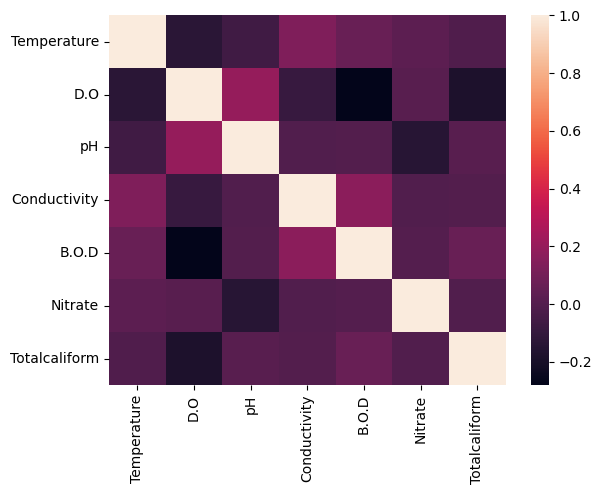

In [37]:
sns.heatmap(X.corr());

In [38]:
[x for x in df['class'].apply(type).unique()]

[str]

In [39]:
df_new['class'].unique()

array([ True, False])

In [40]:
y = df_new['class']

In [41]:
y.value_counts()

class
True     751
False    216
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [44]:
X_train.shape

(773, 7)

In [45]:
y_train.shape

(773,)

In [46]:
X_val.shape

(194, 7)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [48]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

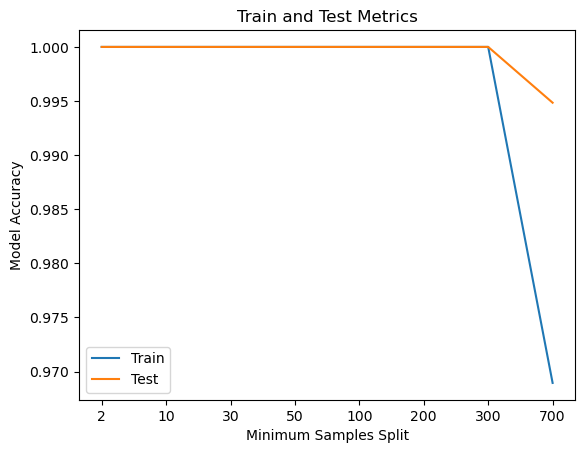

In [49]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

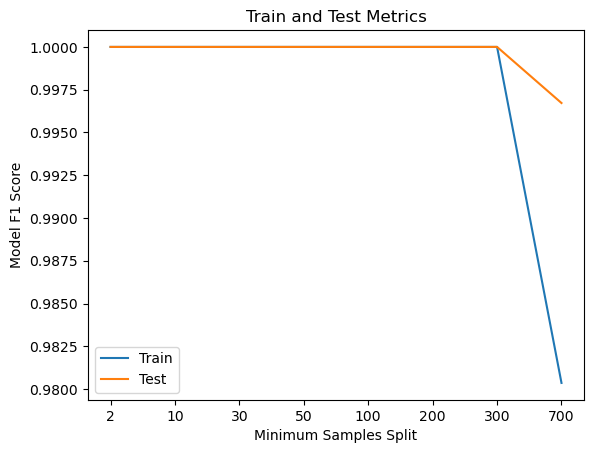

In [50]:
plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [51]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9689521345407504]

In [52]:
accuracy_list_val

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9948453608247423]

In [53]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9803600654664485]

In [54]:
f1_list_val

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9967213114754099]

In [55]:
y_val.value_counts()

class
True     152
False     42
Name: count, dtype: int64

In [56]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

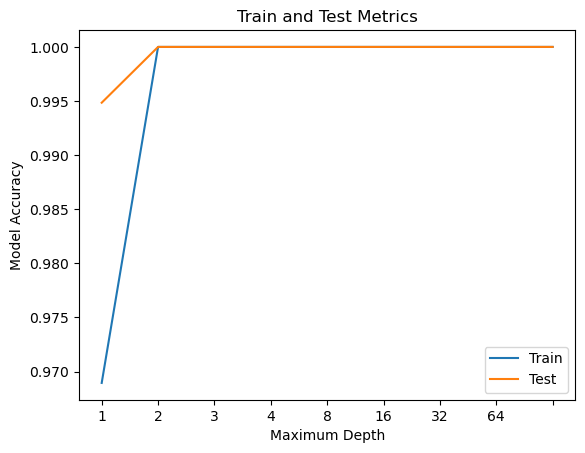

In [57]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

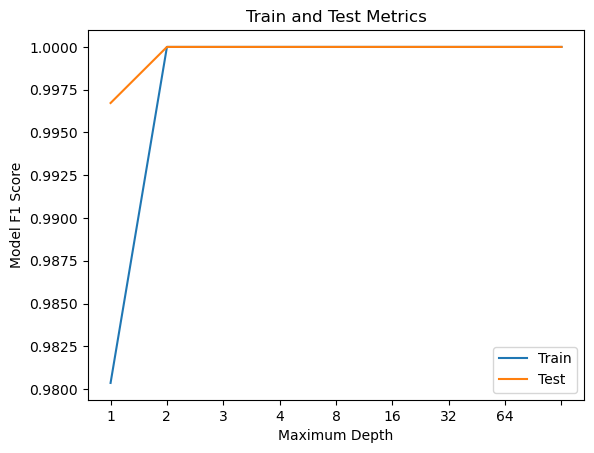

In [58]:
plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [59]:
accuracy_list_train

[0.9689521345407504, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [60]:
f1_list_train

[0.9803600654664485, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [61]:
accuracy_list_val

[0.9948453608247423, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [62]:
f1_list_val

[0.9967213114754099, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

    Chosen max_depth = 4
    Chosen min_samples_split = 50

In [63]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 4,
                                             random_state = 123).fit(X_train,y_train)

In [64]:
for feature, importance in tuple(zip(decision_tree_model.feature_names_in_,
                                     decision_tree_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0000
D.O: 0.0000
pH: 1.0000
Conductivity: 0.0000
B.O.D: 0.0000
Nitrate: 0.0000
Totalcaliform: 0.0000


In [65]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(decision_tree_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 1.0000
f1 for train:
	f1 score: 1.0000
Accuracy for validation:
	Accuracy score: 1.0000
f1 for validation:
	f1 score: 1.0000


In [66]:
check = decision_tree_model.predict(X) == df_new['class']

In [67]:
check.value_counts()

class
True    967
Name: count, dtype: int64

In [68]:
decision_tree_model.feature_importances_

array([0., 0., 1., 0., 0., 0., 0.])

In [69]:
decision_tree_model.feature_names_in_

array(['Temperature', 'D.O', 'pH', 'Conductivity', 'B.O.D', 'Nitrate',
       'Totalcaliform'], dtype=object)

In [70]:
decision_tree_model.get_depth()

2

In [71]:
decision_tree_model.get_n_leaves()

3

In [72]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

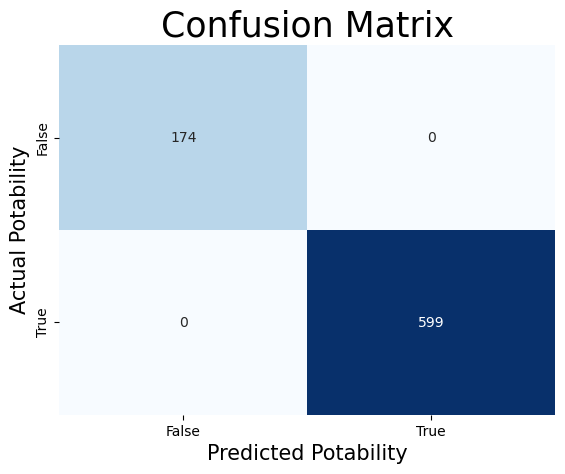

In [73]:
cf_matrix = confusion_matrix(decision_tree_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

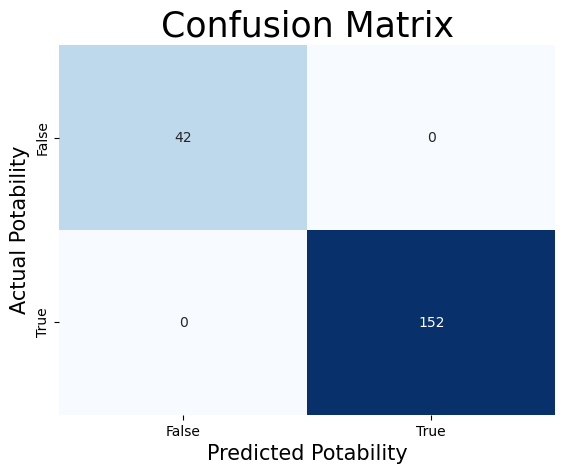

In [74]:
cf_matrix = confusion_matrix(decision_tree_model.predict(X_val),y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

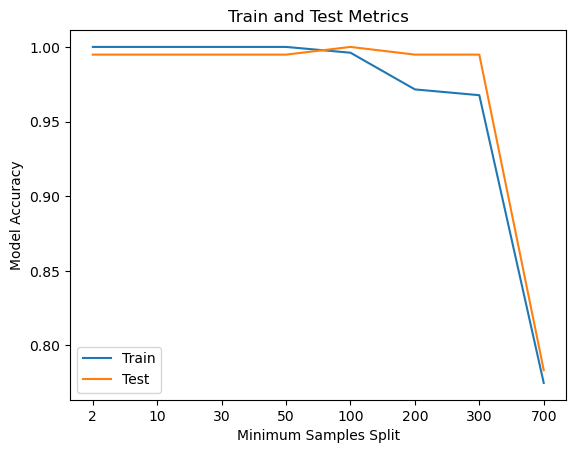

In [77]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

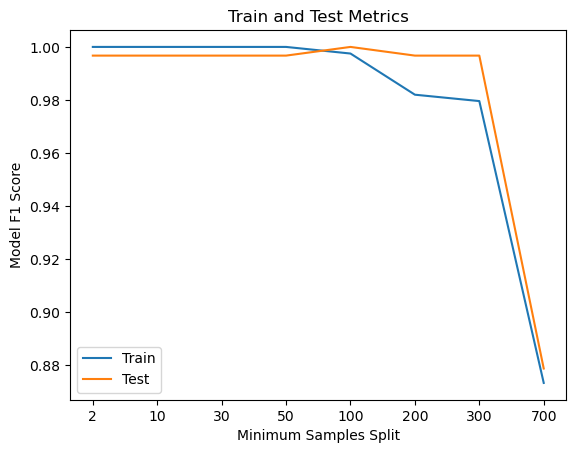

In [78]:
plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [79]:
accuracy_list_train

[1.0,
 1.0,
 1.0,
 1.0,
 0.9961190168175937,
 0.9715394566623544,
 0.9676584734799483,
 0.7749029754204398]

In [80]:
f1_list_train

[1.0,
 1.0,
 1.0,
 1.0,
 0.9975020815986678,
 0.9819672131147541,
 0.9795584627964024,
 0.8731778425655976]

In [81]:
accuracy_list_val

[0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.7835051546391752]

In [82]:
f1_list_val

[0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.8786127167630058]

In [83]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

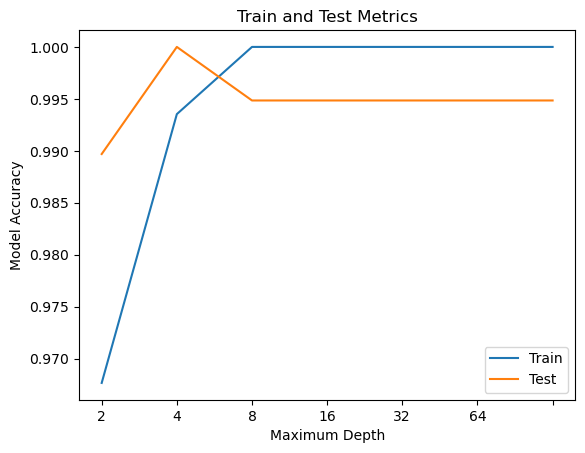

In [84]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

In [85]:
accuracy_list_train

[0.9676584734799483, 0.9935316946959897, 1.0, 1.0, 1.0, 1.0, 1.0]

In [86]:
f1_list_train

[0.9795584627964024, 0.9958437240232751, 1.0, 1.0, 1.0, 1.0, 1.0]

In [87]:
accuracy_list_val

[0.9896907216494846,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [88]:
f1_list_val

[0.9934640522875817,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [89]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

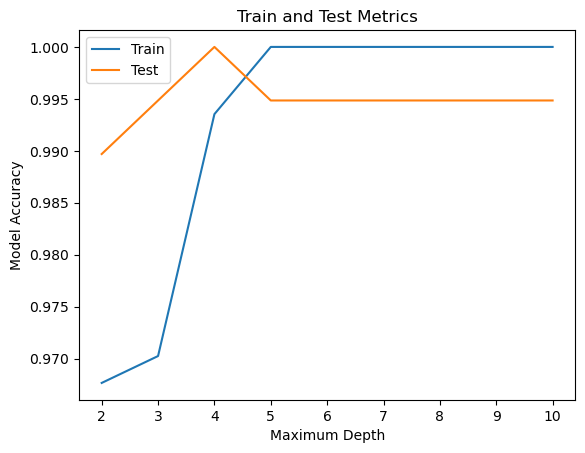

In [90]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

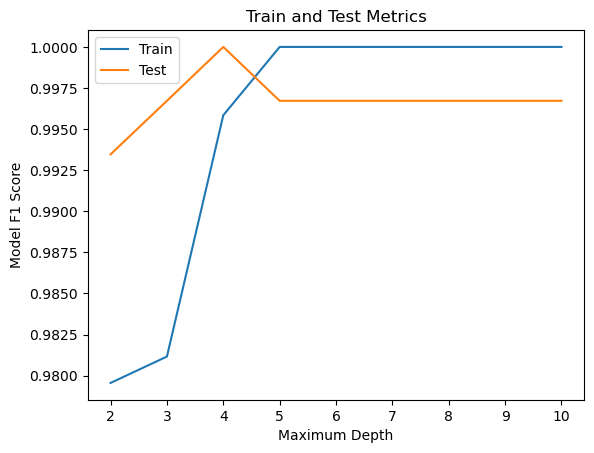

In [91]:
plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [92]:
accuracy_list_train

[0.9676584734799483,
 0.9702457956015524,
 0.9935316946959897,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [93]:
f1_list_train

[0.9795584627964024,
 0.9811629811629812,
 0.9958437240232751,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [94]:
accuracy_list_val

[0.9896907216494846,
 0.9948453608247423,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [95]:
f1_list_val

[0.9934640522875817,
 0.9967213114754099,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [96]:
n_estimators_list = [10,50,100,500,1000,2000]

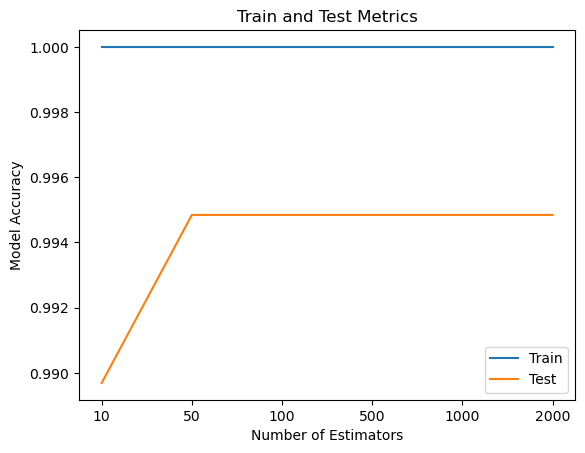

In [97]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

In [98]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [99]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [100]:
accuracy_list_val

[0.9896907216494846,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [101]:
f1_list_val

[0.993421052631579,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [102]:
n_estimators_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

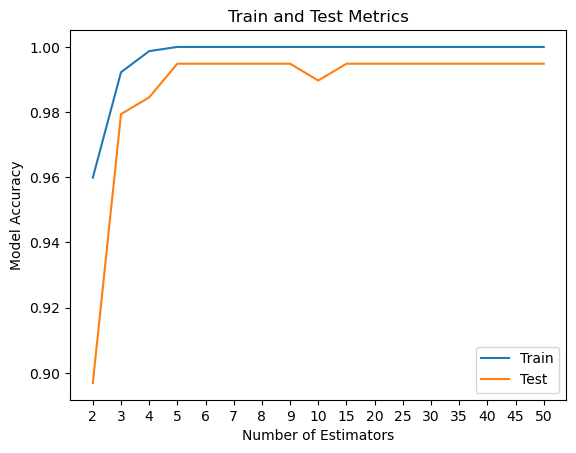

In [103]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

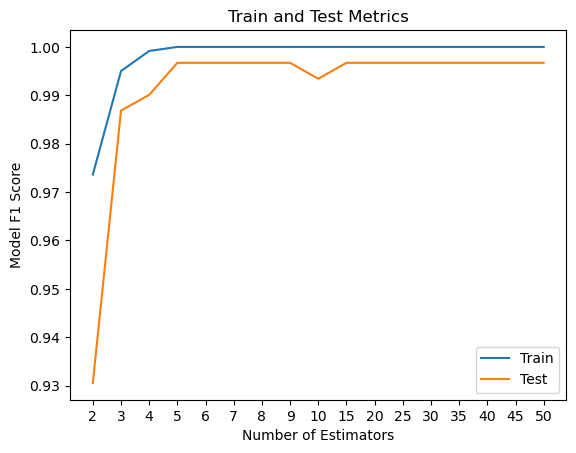

In [104]:
plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [105]:
accuracy_list_train

[0.9598965071151359,
 0.9922380336351876,
 0.9987063389391979,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [106]:
f1_list_train

[0.9736170212765958,
 0.9950083194675541,
 0.9991645781119466,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [107]:
accuracy_list_val

[0.8969072164948454,
 0.979381443298969,
 0.9845360824742269,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9896907216494846,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [108]:
f1_list_val

[0.9305555555555556,
 0.9868421052631579,
 0.9900990099009901,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.993421052631579,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

    Chosen max_depth = 5
    Chosen n_estimators = 5
    Chosen min_samples_split = 100

In [109]:
random_forest_model = RandomForestClassifier(n_estimators = 5,
                                             max_depth = 5, 
                                             min_samples_split = 100).fit(X_train,y_train)

In [110]:
for feature, importance in tuple(zip(random_forest_model.feature_names_in_,
                                     random_forest_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0239
D.O: 0.0951
pH: 0.8209
Conductivity: 0.0243
B.O.D: 0.0249
Nitrate: 0.0049
Totalcaliform: 0.0061


In [111]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(random_forest_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 0.9690
f1 for train:
	f1 score: 0.9803
Accuracy for validation:
	Accuracy score: 0.9897
f1 for validation:
	f1 score: 0.9935


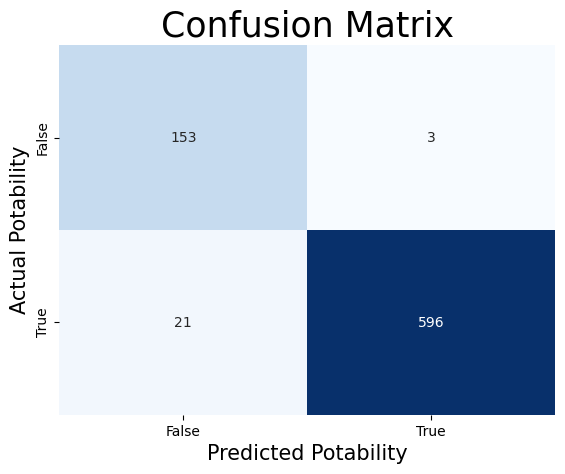

In [112]:
cf_matrix = confusion_matrix(random_forest_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

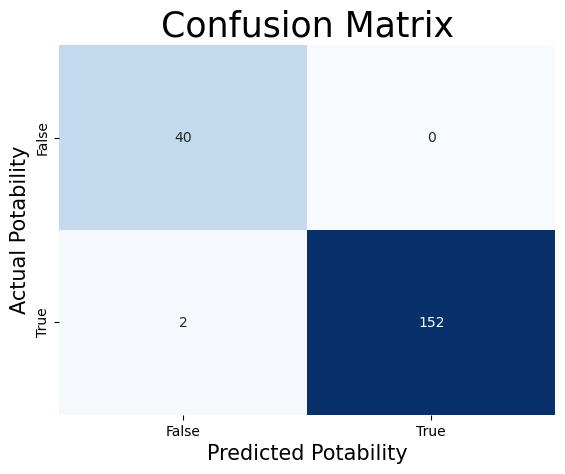

In [113]:
cf_matrix = confusion_matrix(random_forest_model.predict(X_val),y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [114]:
from xgboost import XGBClassifier

In [115]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [116]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [117]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [118]:
X_train.shape

(773, 7)

In [119]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.60012
[1]	validation_0-logloss:0.52364
[2]	validation_0-logloss:0.45966
[3]	validation_0-logloss:0.40546
[4]	validation_0-logloss:0.35906
[5]	validation_0-logloss:0.31902
[6]	validation_0-logloss:0.28424
[7]	validation_0-logloss:0.25386
[8]	validation_0-logloss:0.22720
[9]	validation_0-logloss:0.20372
[10]	validation_0-logloss:0.18296
[11]	validation_0-logloss:0.16457
[12]	validation_0-logloss:0.14822
[13]	validation_0-logloss:0.13367
[14]	validation_0-logloss:0.12068
[15]	validation_0-logloss:0.10908
[16]	validation_0-logloss:0.09869
[17]	validation_0-logloss:0.08939
[18]	validation_0-logloss:0.08103
[19]	validation_0-logloss:0.07353
[20]	validation_0-logloss:0.06679
[21]	validation_0-logloss:0.06072
[22]	validation_0-logloss:0.05525
[23]	validation_0-logloss:0.05032
[24]	validation_0-logloss:0.04588
[25]	validation_0-logloss:0.04187
[26]	validation_0-logloss:0.03825
[27]	validation_0-logloss:0.03497
[28]	validation_0-logloss:0.03201
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00448
[239]	validation_0-logloss:0.00448
[240]	validation_0-logloss:0.00449
[241]	validation_0-logloss:0.00448
[242]	validation_0-logloss:0.00448
[243]	validation_0-logloss:0.00448
[244]	validation_0-logloss:0.00448
[245]	validation_0-logloss:0.00447
[246]	validation_0-logloss:0.00447
[247]	validation_0-logloss:0.00447
[248]	validation_0-logloss:0.00447
[249]	validation_0-logloss:0.00447
[250]	validation_0-logloss:0.00447
[251]	validation_0-logloss:0.00447
[252]	validation_0-logloss:0.00446
[253]	validation_0-logloss:0.00446
[254]	validation_0-logloss:0.00446
[255]	validation_0-logloss:0.00446
[256]	validation_0-logloss:0.00446
[257]	validation_0-logloss:0.00446
[258]	validation_0-logloss:0.00445
[259]	validation_0-logloss:0.00446
[260]	validation_0-logloss:0.00445
[261]	validation_0-logloss:0.00445
[262]	validation_0-logloss:0.00445
[263]	validation_0-logloss:0.00445
[264]	validation_0-logloss:0.00445
[265]	validation_0-logloss:0.00445
[266]	validation_0-l

[473]	validation_0-logloss:0.00440
[474]	validation_0-logloss:0.00440
[475]	validation_0-logloss:0.00440
[476]	validation_0-logloss:0.00440
[477]	validation_0-logloss:0.00440
[478]	validation_0-logloss:0.00440
[479]	validation_0-logloss:0.00440
[480]	validation_0-logloss:0.00440
[481]	validation_0-logloss:0.00439
[482]	validation_0-logloss:0.00440
[483]	validation_0-logloss:0.00440
[484]	validation_0-logloss:0.00440
[485]	validation_0-logloss:0.00439
[486]	validation_0-logloss:0.00440
[487]	validation_0-logloss:0.00439
[488]	validation_0-logloss:0.00440
[489]	validation_0-logloss:0.00440
[490]	validation_0-logloss:0.00440
[491]	validation_0-logloss:0.00440
[492]	validation_0-logloss:0.00440
[493]	validation_0-logloss:0.00440
[494]	validation_0-logloss:0.00440
[495]	validation_0-logloss:0.00440
[496]	validation_0-logloss:0.00440
[497]	validation_0-logloss:0.00440
[498]	validation_0-logloss:0.00440
[499]	validation_0-logloss:0.00440


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [120]:
xgb_model.best_iteration

499

In [121]:
for feature, importance in tuple(zip(random_forest_model.feature_names_in_,
                                     xgb_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0027
D.O: 0.0002
pH: 0.9916
Conductivity: 0.0004
B.O.D: 0.0020
Nitrate: 0.0011
Totalcaliform: 0.0020


In [122]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nAccuracy for test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(xgb_model.predict(X_train),y_train):.4f}\nf1 for test:\n\tf1 score: {f1_score(xgb_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 1.0000
Accuracy for test:
	Accuracy score: 1.0000
f1 for train:
	f1 score: 1.0000
f1 for test:
	f1 score: 1.0000


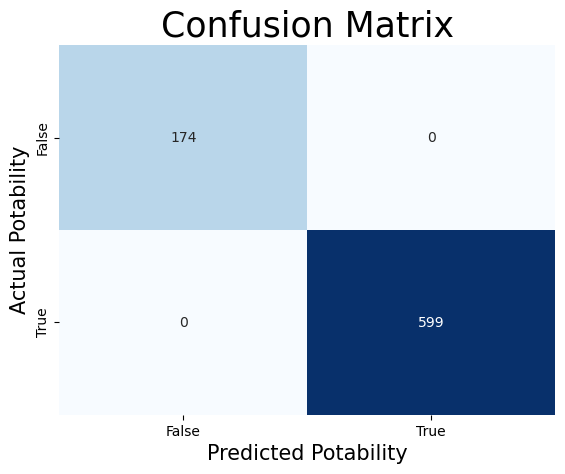

In [123]:
cf_matrix = confusion_matrix(xgb_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

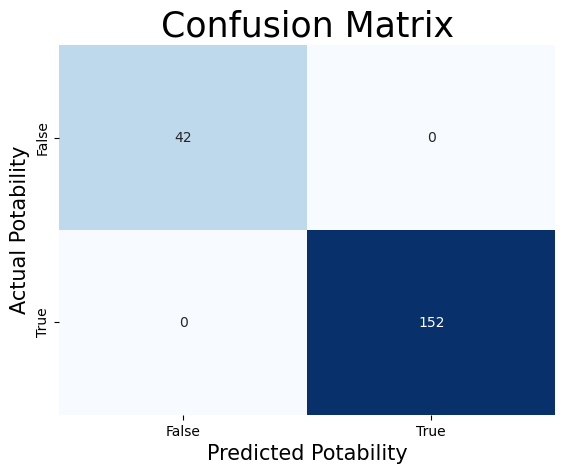

In [124]:
cf_matrix = confusion_matrix(xgb_model.predict(X_val),y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train)
Xn = norm(X_train)

In [150]:
lamda = 0.001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=3000
)

Epoch 1/3000
25/25 [==============================] - 1s 2ms/step - loss: 0.4934
Epoch 2/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 3/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 4/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1693
Epoch 5/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1676
Epoch 6/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.1394
Epoch 7/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1333
Epoch 8/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 9/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1102
Epoch 10/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1169
Epoch 11/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1612
Epoch 12/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1449
Epoch 13/3000
25/25 [====

25/25 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 102/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 103/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 104/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 105/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 106/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 107/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 108/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 109/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 110/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 111/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 112/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 113/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 298/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 299/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0613
Epoch 300/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 301/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 302/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 303/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 304/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 305/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 306/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 307/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 308/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 309/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 494/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 495/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 496/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 497/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 498/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 499/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 500/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 501/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 502/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 503/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 504/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 505/3000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 690/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0360
Epoch 691/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 692/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 693/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 694/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 695/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 696/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0607
Epoch 697/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 698/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 699/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 700/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 701/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 886/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 887/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 888/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 889/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 890/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 891/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 892/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 893/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.0805
Epoch 894/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 895/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0381
Epoch 896/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0324
Epoch 897/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 1081/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 1082/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 1083/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 1084/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 1085/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 1086/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 1087/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 1088/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 1089/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 1090/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 1091/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 10

25/25 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 1275/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1276/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 1277/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 1278/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 1279/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 1280/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 1281/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 1282/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 1283/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 1284/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 1285/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 12

25/25 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 1469/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 1470/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 1471/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1472/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 1473/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 1474/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1475/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 1476/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 1477/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 1478/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 1479/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 14

25/25 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1663/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 1664/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 1665/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 1666/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 1667/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 1668/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 1669/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 1670/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 1671/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 1672/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 1673/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 16

25/25 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 1857/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 1858/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 1859/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 1860/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 1861/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 1862/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 1863/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 1864/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 1865/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 1866/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 1867/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 18

25/25 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 2051/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 2052/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 2053/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 2054/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 2055/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 2056/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0451
Epoch 2057/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 2058/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0367
Epoch 2059/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 2060/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 2061/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 20

25/25 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 2245/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 2246/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 2247/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 2248/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 2249/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 2250/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 2251/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0365
Epoch 2252/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 2253/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 2254/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 2255/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 22

25/25 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 2439/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 2440/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 2441/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.0405
Epoch 2442/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.0360
Epoch 2443/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 2444/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 2445/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 2446/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 2447/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 2448/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 2449/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 24

25/25 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 2633/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 2634/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 2635/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 2636/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 2637/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 2638/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 2639/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 2640/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 2641/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 2642/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 2643/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 26

25/25 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 2827/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 2828/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 2829/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 2830/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 2831/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 2832/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 2833/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 2834/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 2835/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 2836/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 2837/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 28

In [151]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 1ms/step


In [152]:
acc_pred

0.9742268041237113

In [153]:
acc_train

0.9974126778783958

In [154]:
f1_pred

0.9834983498349835

In [155]:
f1_train

0.9983277591973244

In [156]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

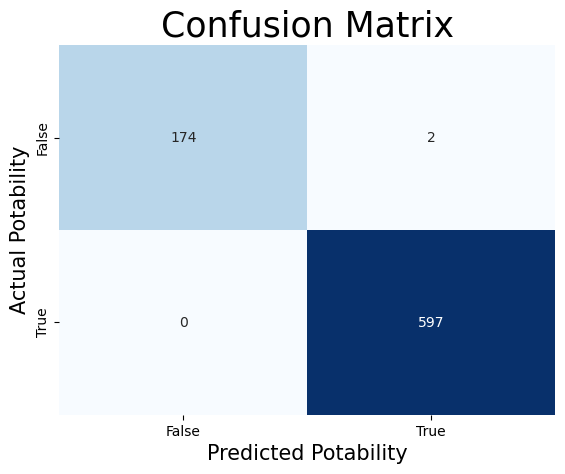

In [157]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

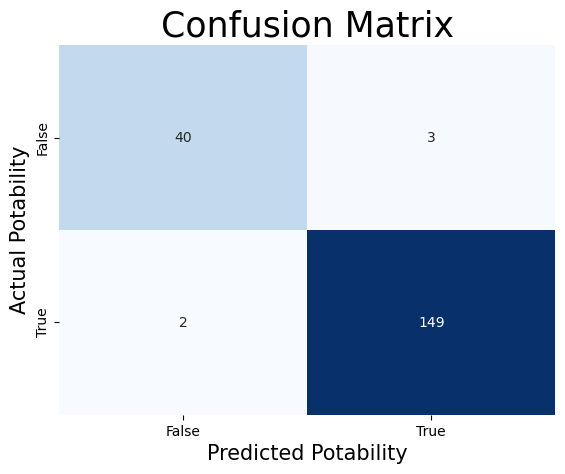

In [158]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [159]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=3000
)

Epoch 1/3000
25/25 [==============================] - 1s 2ms/step - loss: 0.4614
Epoch 2/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.2216
Epoch 3/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1433
Epoch 4/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1506
Epoch 5/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1214
Epoch 6/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 7/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1111
Epoch 8/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 9/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 10/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 11/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1180
Epoch 12/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.1099
Epoch 13/3000
25/25 [====

25/25 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 102/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 103/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 104/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 105/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 106/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 107/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 108/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 109/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 110/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 111/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 112/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0391
Epoch 113/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 298/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 299/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 300/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 301/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 302/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 303/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 304/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 305/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0748
Epoch 306/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 307/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 308/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 309/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 494/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 495/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 496/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 497/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 498/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 499/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 500/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 501/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 502/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 503/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 504/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 505/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 690/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 691/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 692/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 693/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 694/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 695/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 696/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 697/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 698/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 699/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 700/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 701/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 886/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 887/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 888/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 889/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 890/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 891/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 892/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 893/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 894/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 895/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 896/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 897/3000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 1081/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 1082/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 1083/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 1084/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 1085/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1086/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 1087/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 1088/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 1089/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 1090/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 1091/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 10

25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1275/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1276/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 1277/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1278/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1279/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1280/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 1281/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1282/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 1283/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 1284/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 1285/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 12

25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 1469/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1470/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 1471/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1472/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1473/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 1474/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 1475/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 1476/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 1477/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 1478/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 1479/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 14

25/25 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1663/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 1664/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1665/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 1666/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1667/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1668/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 1669/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 1670/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 1671/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1672/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1673/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 16

25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 1857/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 1858/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 1859/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 1860/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1861/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1862/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1863/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1864/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1865/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1866/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1867/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 18

25/25 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 2051/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 2052/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 2053/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 2054/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2055/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2056/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 2057/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 2058/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 2059/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 2060/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 2061/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 20

25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 2245/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 2246/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 2247/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 2248/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 2249/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 2250/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 2251/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 2252/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 2253/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 2254/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 2255/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 22

25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2439/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2440/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2441/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2442/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2443/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2444/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2445/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 2446/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 2447/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2448/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2449/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 24

25/25 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 2633/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 2634/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 2635/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 2636/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 2637/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2638/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2639/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 2640/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 2641/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2642/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 2643/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 26

25/25 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 2827/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 2828/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 2829/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 2830/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 2831/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 2832/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2833/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 2834/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2835/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2836/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 2837/3000
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 28

In [160]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [161]:
acc_pred

0.979381443298969

In [162]:
acc_train

0.9974126778783958

In [163]:
f1_pred

0.9869281045751634

In [164]:
f1_train

0.9983333333333333

In [165]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

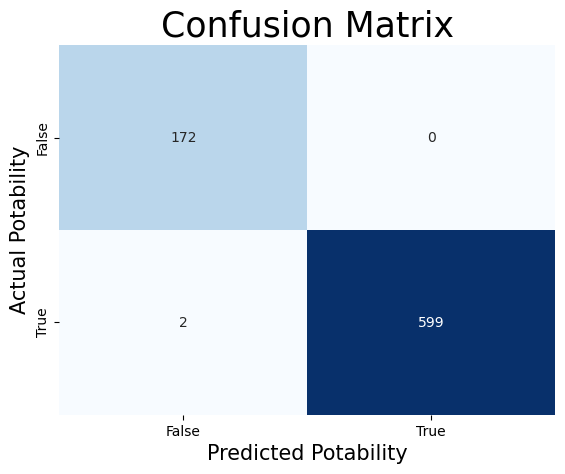

In [166]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

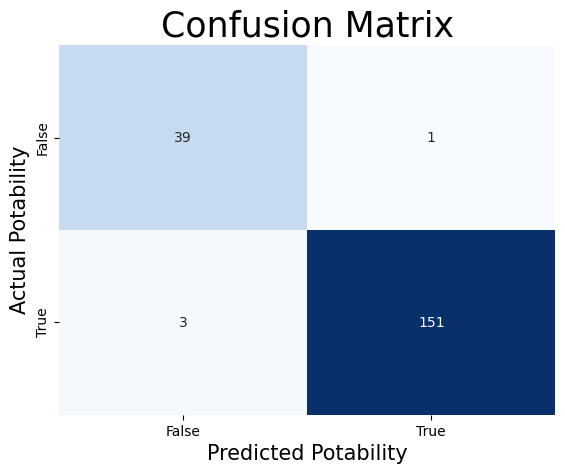

In [167]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [168]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=6000
)

Epoch 1/6000
25/25 [==============================] - 1s 3ms/step - loss: 0.4113
Epoch 2/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 3/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1616
Epoch 4/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1534
Epoch 5/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1196
Epoch 6/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 7/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1535
Epoch 8/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0882
Epoch 9/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 10/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0851
Epoch 11/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 12/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 13/6000
25/25 [====

25/25 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 102/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 103/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 104/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 105/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 106/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 107/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 108/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 109/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 110/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 111/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 112/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 113/6000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 298/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 299/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 300/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 301/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 302/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 303/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 304/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 305/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 306/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 307/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 308/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 309/6000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 494/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 495/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 496/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1135
Epoch 497/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 498/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 499/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 500/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 501/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 502/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 503/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 504/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 505/6000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 690/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 691/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 692/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 693/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 694/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 695/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 696/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 697/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 698/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 699/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 700/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 701/6000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 886/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 887/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 888/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 889/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 890/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 891/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 892/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 893/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 894/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 895/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 896/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 897/6000
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 1081/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 1082/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 1083/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 1084/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 1085/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 1086/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 1087/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 1088/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 1089/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 1090/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 1091/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 10

25/25 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 1275/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 1276/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 1277/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 1278/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 1279/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1280/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1281/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 1282/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 1283/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 1284/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 1285/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 12

25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 1469/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 1470/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1471/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 1472/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 1473/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 1474/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 1475/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 1476/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 1477/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 1478/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1479/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 14

25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 1663/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 1664/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1665/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 1666/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 1667/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 1668/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 1669/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1670/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1671/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 1672/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 1673/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 16

25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 1857/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 1858/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 1859/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1860/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 1861/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1862/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 1863/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1864/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1865/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1866/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1867/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 18

25/25 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 2051/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2052/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 2053/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 2054/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 2055/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 2056/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 2057/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 2058/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2059/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 2060/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 2061/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 20

25/25 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 2245/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 2246/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2247/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 2248/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2249/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 2250/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 2251/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 2252/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 2253/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 2254/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 2255/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 22

25/25 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 2439/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 2440/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2441/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 2442/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 2443/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 2444/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 2445/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2446/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 2447/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 2448/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 2449/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 24

25/25 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 2633/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 2634/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 2635/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 2636/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 2637/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 2638/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 2639/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 2640/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 2641/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 2642/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 2643/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 26

25/25 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 2827/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 2828/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2829/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2830/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 2831/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 2832/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 2833/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 2834/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 2835/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 2836/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 2837/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 28

25/25 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 3021/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 3022/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3023/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3024/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 3025/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 3026/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3027/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 3028/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3029/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 3030/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 3031/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 30

25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 3215/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 3216/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 3217/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 3218/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3219/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 3220/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3221/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 3222/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 3223/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 3224/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 3225/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 32

25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 3409/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 3410/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3411/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 3412/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 3413/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 3414/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 3415/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3416/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 3417/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3418/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 3419/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 34

25/25 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 3603/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 3604/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 3605/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 3606/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 3607/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 3608/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 3609/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 3610/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 3611/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 3612/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 3613/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 36

25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3797/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 3798/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 3799/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 3800/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3801/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 3802/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 3803/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 3804/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 3805/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3806/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 3807/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 38

25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 3991/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 3992/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 3993/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 3994/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 3995/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 3996/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 3997/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3998/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 3999/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 4000/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 4001/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 40

25/25 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 4185/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 4186/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 4187/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 4188/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 4189/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4190/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 4191/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 4192/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 4193/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 4194/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 4195/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 41

25/25 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 4379/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 4380/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 4381/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 4382/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 4383/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 4384/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 4385/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 4386/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4387/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4388/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 4389/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 43

25/25 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 4573/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 4574/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 4575/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 4576/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 4577/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 4578/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 4579/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 4580/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 4581/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 4582/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 4583/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 45

25/25 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 4767/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 4768/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4769/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 4770/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 4771/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 4772/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 4773/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 4774/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 4775/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 4776/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 4777/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 47

25/25 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 4961/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 4962/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 4963/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 4964/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 4965/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 4966/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 4967/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 4968/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 4969/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 4970/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 4971/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 49

25/25 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 5155/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 5156/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 5157/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 5158/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 5159/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 5160/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 5161/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 5162/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 5163/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 5164/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 5165/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 51

25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 5349/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 5350/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 5351/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 5352/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 5353/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 5354/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0939
Epoch 5355/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1027
Epoch 5356/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 5357/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0338
Epoch 5358/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 5359/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 53

25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 5543/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 5544/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 5545/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 5546/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 5547/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 5548/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 5549/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 5550/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 5551/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 5552/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 5553/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 55

25/25 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 5737/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 5738/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5739/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 5740/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 5741/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 5742/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 5743/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 5744/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 5745/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 5746/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 5747/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 57

25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 5931/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5932/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 5933/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 5934/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 5935/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 5936/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 5937/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 5938/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 5939/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 5940/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 5941/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 59

In [169]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [170]:
acc_pred

0.9845360824742269

In [171]:
acc_train

0.9935316946959897

In [172]:
f1_pred

0.9900990099009901

In [173]:
f1_train

0.9958437240232751

In [174]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ 

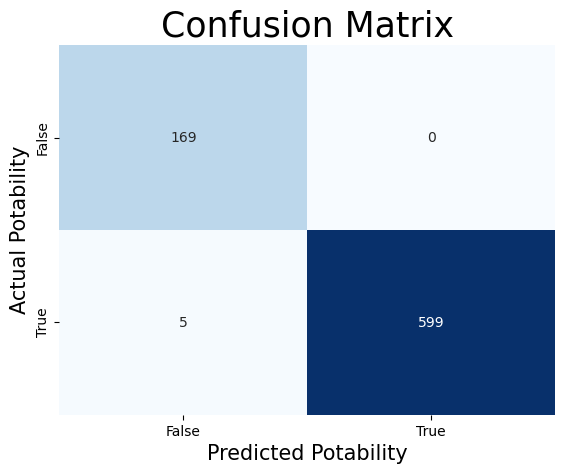

In [175]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

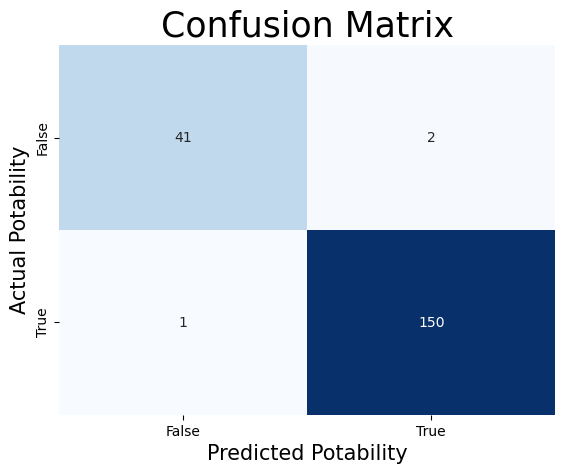

In [176]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [177]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=5439
)

Epoch 1/5439
25/25 [==============================] - 1s 2ms/step - loss: 0.4289
Epoch 2/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 3/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1187
Epoch 4/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 5/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1263
Epoch 6/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 7/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1014
Epoch 8/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 9/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1171
Epoch 10/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0841
Epoch 11/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 12/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 13/5439
25/25 [====

25/25 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 102/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 103/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0618
Epoch 104/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 105/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 106/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0407
Epoch 107/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 108/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 109/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0407
Epoch 110/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 111/5439
25/25 [==============================] - 0s 12ms/step - loss: 0.0475
Epoch 112/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0314
Epoch 113/5439
25/

25/25 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 298/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 299/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 300/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 301/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 302/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 303/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 304/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 305/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 306/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 307/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 308/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 309/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 494/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 495/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 496/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 497/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 498/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 499/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 500/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 501/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 502/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 503/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 504/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 505/5439
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 690/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 691/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 692/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 693/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 694/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 695/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 696/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 697/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 698/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 699/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 700/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 701/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 886/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 887/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 888/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 889/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 890/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 891/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 892/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 893/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 894/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 895/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 896/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 897/5439
25/2

25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 1081/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 1082/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1083/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 1084/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 1085/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1086/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1087/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1088/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 1089/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1090/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 1091/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 10

25/25 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 1275/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 1276/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1277/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 1278/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 1279/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1280/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1281/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1282/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 1283/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 1284/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 1285/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 12

25/25 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1469/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 1470/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1471/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 1472/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1473/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1474/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 1475/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 1476/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 1477/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1478/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1479/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 14

25/25 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 1663/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 1664/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1665/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1666/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 1667/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 1668/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1669/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 1670/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 1671/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1672/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1673/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 16

25/25 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 1857/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1858/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1859/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1860/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1861/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 1862/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 1863/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1864/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1865/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 1866/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1867/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 18

25/25 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 2051/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 2052/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 2053/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 2054/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 2055/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 2056/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 2057/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 2058/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 2059/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 2060/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 2061/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 20

25/25 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 2245/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 2246/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 2247/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2248/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 2249/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 2250/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 2251/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 2252/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2253/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 2254/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 2255/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 22

25/25 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2439/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 2440/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2441/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2442/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 2443/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 2444/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2445/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 2446/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 2447/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 2448/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2449/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 24

25/25 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 2633/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 2634/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 2635/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 2636/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 2637/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 2638/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 2639/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 2640/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 2641/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 2642/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 2643/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 26

25/25 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2827/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 2828/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 2829/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 2830/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 2831/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 2832/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 2833/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 2834/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2835/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 2836/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2837/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 28

25/25 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3021/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3022/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 3023/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 3024/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 3025/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 3026/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 3027/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 3028/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1012
Epoch 3029/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 3030/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 3031/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 30

25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 3215/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 3216/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 3217/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 3218/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 3219/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 3220/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 3221/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 3222/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 3223/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 3224/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 3225/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 32

25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 3409/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 3410/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3411/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 3412/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 3413/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 3414/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 3415/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 3416/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 3417/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 3418/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 3419/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 34

25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3603/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 3604/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3605/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 3606/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 3607/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 3608/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 3609/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 3610/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 3611/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 3612/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 3613/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 36

25/25 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 3797/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 3798/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 3799/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 3800/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 3801/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 3802/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 3803/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 3804/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0595
Epoch 3805/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1136
Epoch 3806/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 3807/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 38

25/25 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 3991/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 3992/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 3993/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 3994/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 3995/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 3996/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 3997/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 3998/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 3999/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 4000/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 4001/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 40

25/25 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 4185/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 4186/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 4187/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 4188/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 4189/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 4190/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 4191/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 4192/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 4193/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 4194/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 4195/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 41

25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4379/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 4380/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 4381/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 4382/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 4383/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 4384/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 4385/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 4386/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 4387/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 4388/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 4389/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 43

25/25 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 4573/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 4574/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 4575/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 4576/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 4577/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 4578/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 4579/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 4580/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 4581/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 4582/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 4583/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 45

25/25 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 4767/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4768/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 4769/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 4770/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 4771/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 4772/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 4773/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 4774/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 4775/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 4776/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 4777/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 47

25/25 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 4961/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 4962/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4963/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4964/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 4965/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 4966/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 4967/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4968/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 4969/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 4970/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 4971/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 49

25/25 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 5155/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 5156/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5157/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 5158/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 5159/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 5160/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 5161/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 5162/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 5163/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 5164/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 5165/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 51

25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5349/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 5350/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 5351/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 5352/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 5353/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 5354/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 5355/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 5356/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 5357/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 5358/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 5359/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 53

In [178]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 2ms/step


In [179]:
acc_pred

0.9845360824742269

In [180]:
acc_train

0.9987063389391979

In [181]:
f1_pred

0.9901639344262295

In [182]:
f1_train

0.9991645781119466

In [183]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

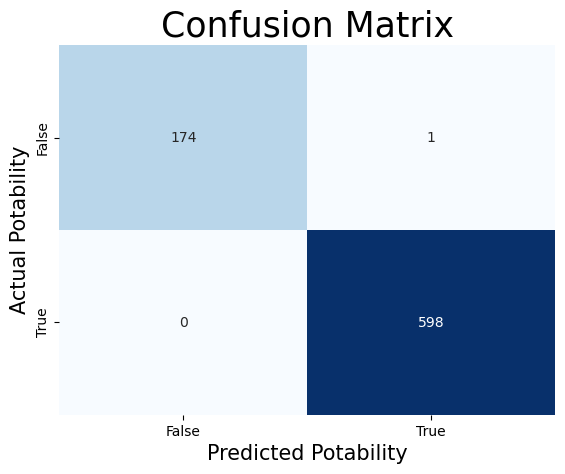

In [184]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

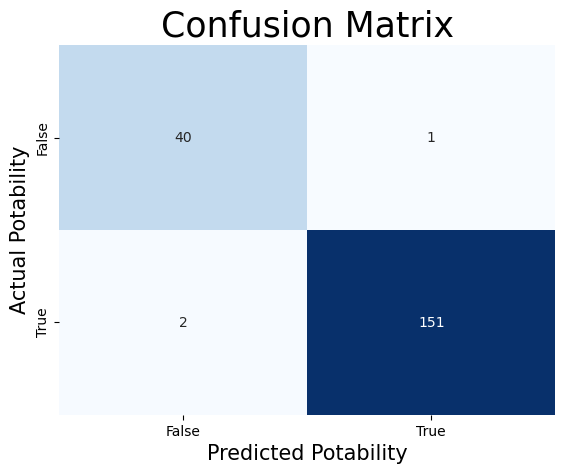

In [185]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [51]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=5439
)

Epoch 1/5439
25/25 [==============================] - 2s 3ms/step - loss: 0.4089
Epoch 2/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 3/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1268
Epoch 4/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1226
Epoch 5/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1045
Epoch 6/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1513
Epoch 7/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 8/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 9/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0732
Epoch 10/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 11/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 12/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 13/5439
25/25 [====

25/25 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 102/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 103/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 104/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0415
Epoch 105/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0334
Epoch 106/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 107/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 108/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 109/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0315
Epoch 110/5439
25/25 [==============================] - 0s 9ms/step - loss: 0.0508
Epoch 111/5439
25/25 [==============================] - 0s 8ms/step - loss: 0.0547
Epoch 112/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0389
Epoch 113/5439
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.0280
Epoch 298/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 299/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 300/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0291
Epoch 301/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 302/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 303/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 304/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 305/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 306/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 307/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0286
Epoch 308/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 309/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 494/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0340
Epoch 495/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 496/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 497/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 498/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 499/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 500/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 501/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 502/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 503/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 504/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 505/5439
25/2

25/25 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 690/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 691/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 692/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0155
Epoch 693/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0167
Epoch 694/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 695/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 696/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 697/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 698/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 699/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 700/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 701/5439
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 886/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 887/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 888/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 889/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 890/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 891/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 892/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 893/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 894/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 895/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 896/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 897/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 1081/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 1082/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 1083/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 1084/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 1085/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 1086/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 1087/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 1088/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 1089/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 1090/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0295
Epoch 1091/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 10

25/25 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 1275/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 1276/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 1277/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1278/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 1279/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 1280/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 1281/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0652
Epoch 1282/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1283/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 1284/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 1285/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 12

25/25 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 1469/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 1470/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 1471/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 1472/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 1473/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 1474/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 1475/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 1476/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 1477/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 1478/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 1479/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 14

25/25 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 1663/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 1664/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 1665/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 1666/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 1667/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 1668/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 1669/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 1670/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 1671/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 1672/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 1673/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 16

25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1857/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 1858/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1859/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 1860/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 1861/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 1862/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 1863/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 1864/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 1865/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1866/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 1867/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 18

25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 2051/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2052/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2053/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2054/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 2055/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 2056/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0398
Epoch 2057/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 2058/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 2059/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 2060/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 2061/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 20

25/25 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 2245/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 2246/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 2247/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 2248/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 2249/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 2250/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 2251/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 2252/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 2253/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 2254/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 2255/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 22

25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 2439/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2440/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 2441/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 2442/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2443/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 2444/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 2445/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 2446/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 2447/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 2448/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 2449/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 24

25/25 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 2633/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 2634/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 2635/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2636/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 2637/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 2638/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 2639/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 2640/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 2641/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 2642/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 2643/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 26

25/25 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 2827/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 2828/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 2829/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 2830/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 2831/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 2832/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 2833/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 2834/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2835/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 2836/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 2837/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 28

25/25 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 3021/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 3022/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 3023/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 3024/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 3025/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 3026/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 3027/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 3028/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 3029/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 3030/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 3031/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 30

25/25 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 3215/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 3216/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 3217/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 3218/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 3219/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 3220/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 3221/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 3222/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 3223/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 3224/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 3225/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0305
Epoch 32

25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 3409/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 3410/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 3411/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 3412/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 3413/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 3414/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 3415/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 3416/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 3417/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 3418/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 3419/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 34

25/25 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 3603/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 3604/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 3605/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 3606/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 3607/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 3608/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0182
Epoch 3609/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 3610/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 3611/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 3612/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 3613/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 36

25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 3797/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 3798/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 3799/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 3800/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 3801/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 3802/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 3803/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 3804/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 3805/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 3806/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 3807/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 38

25/25 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 3991/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 3992/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 3993/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 3994/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 3995/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3996/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 3997/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 3998/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 3999/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 4000/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 4001/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 40

25/25 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4185/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 4186/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4187/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 4188/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 4189/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 4190/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0439
Epoch 4191/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.1509
Epoch 4192/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 4193/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 4194/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 4195/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 41

25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4379/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 4380/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4381/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4382/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 4383/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 4384/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4385/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4386/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 4387/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 4388/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 4389/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 43

25/25 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 4573/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 4574/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4575/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 4576/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 4577/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 4578/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 4579/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 4580/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 4581/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 4582/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 4583/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 45

25/25 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 4767/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 4768/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 4769/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 4770/5439
25/25 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4771/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 4772/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 4773/5439
25/25 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 4774/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 4775/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 4776/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 4777/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 4

25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4961/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 4962/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 4963/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 4964/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 4965/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 4966/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 4967/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 4968/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 4969/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 4970/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 4971/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 49

25/25 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 5155/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 5156/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 5157/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 5158/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 5159/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 5160/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 5161/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 5162/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 5163/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 5164/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 5165/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 51

25/25 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 5349/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 5350/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 5351/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 5352/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 5353/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 5354/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 5355/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 5356/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 5357/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 5358/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 5359/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 53

In [52]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 4ms/step


In [53]:
acc_pred

0.9896907216494846

In [54]:
acc_train

0.9974126778783958

In [55]:
f1_pred

0.9934640522875817

In [56]:
f1_train

0.998330550918197

In [57]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

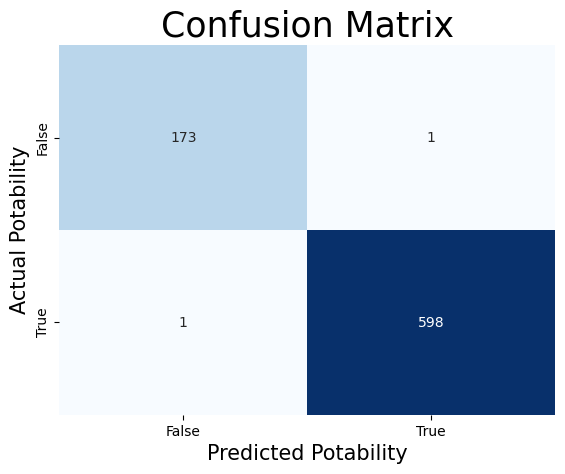

In [58]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

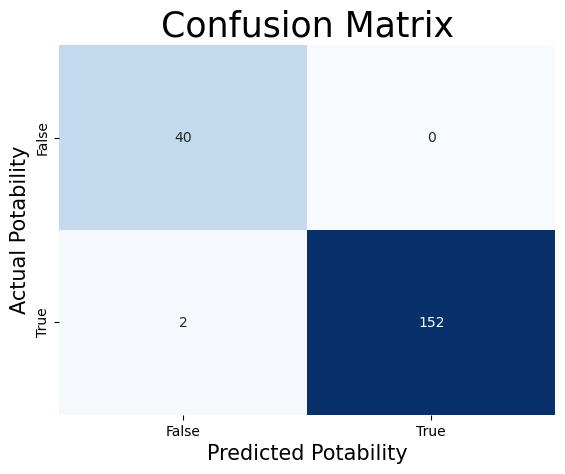

In [59]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [71]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
nn_model.fit(
    Xn,y_train,
    epochs=6000
)

Epoch 1/6000
25/25 [==============================] - 2s 3ms/step - loss: 0.4222
Epoch 2/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1911
Epoch 3/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1497
Epoch 4/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1550
Epoch 5/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 6/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.1653
Epoch 7/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1136
Epoch 8/6000
25/25 [==============================] - 0s 2ms/step - loss: 0.1013
Epoch 9/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 10/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 11/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 12/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 13/6000
25/25 [====

25/25 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 102/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0339
Epoch 103/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 104/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 105/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 106/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0280
Epoch 107/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 108/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 109/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0365
Epoch 110/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 111/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 112/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 113/6000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 298/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 299/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0251
Epoch 300/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0308
Epoch 301/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 302/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 303/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 304/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 305/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 306/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 307/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0201
Epoch 308/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0191
Epoch 309/6000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 494/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0286
Epoch 495/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 496/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 497/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 498/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 499/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 500/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 501/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 502/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 503/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 504/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 505/6000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 690/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 691/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 692/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 693/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 694/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0618
Epoch 695/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 696/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0338
Epoch 697/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 698/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 699/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 700/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0208
Epoch 701/6000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.0756
Epoch 886/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 887/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0434
Epoch 888/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0337
Epoch 889/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0315
Epoch 890/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 891/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 892/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 893/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0253
Epoch 894/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 895/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 896/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0199
Epoch 897/6000
25/2

25/25 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 1081/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 1082/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 1083/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 1084/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1085/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1086/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 1087/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 1088/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.1344
Epoch 1089/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 1090/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 1091/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0225
Epoch 10

25/25 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1275/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 1276/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1277/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 1278/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 1279/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 1280/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 1281/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 1282/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 1283/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 1284/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 1285/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 12

25/25 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 1469/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 1470/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 1471/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 1472/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 1473/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 1474/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 1475/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1476/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 1477/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 1478/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 1479/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 14

25/25 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 1663/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 1664/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 1665/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 1666/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 1667/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 1668/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 1669/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 1670/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 1671/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0146
Epoch 1672/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0146
Epoch 1673/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 16

25/25 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 1857/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 1858/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 1859/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0344
Epoch 1860/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 1861/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 1862/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 1863/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 1864/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 1865/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0236
Epoch 1866/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 1867/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 18

25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 2051/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 2052/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 2053/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 2054/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0110
Epoch 2055/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 2056/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 2057/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 2058/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 2059/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 2060/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0401
Epoch 2061/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 20

25/25 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 2245/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 2246/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 2247/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 2248/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 2249/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 2250/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 2251/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 2252/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0445
Epoch 2253/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 2254/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 2255/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 22

25/25 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 2439/6000
25/25 [==============================] - 0s 7ms/step - loss: 0.0124
Epoch 2440/6000
25/25 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 2441/6000
25/25 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 2442/6000
25/25 [==============================] - 0s 7ms/step - loss: 0.0162
Epoch 2443/6000
25/25 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 2444/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 2445/6000
25/25 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 2446/6000
25/25 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 2447/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 2448/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 2449/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 24

25/25 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 2633/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 2634/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 2635/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 2636/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 2637/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 2638/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2639/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 2640/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 2641/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 2642/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 2643/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 26

25/25 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 2827/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 2828/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 2829/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 2830/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 2831/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 2832/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 2833/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 2834/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 2835/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 2836/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 2837/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 28

25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3021/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 3022/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 3023/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 3024/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 3025/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3026/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3027/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 3028/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 3029/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 3030/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 3031/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 30

25/25 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 3215/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 3216/6000
25/25 [==============================] - 0s 16ms/step - loss: 0.0169
Epoch 3217/6000
25/25 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 3218/6000
25/25 [==============================] - 0s 14ms/step - loss: 0.0161
Epoch 3219/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 3220/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 3221/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3222/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3223/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 3224/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 3225/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch

25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3409/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0399
Epoch 3410/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3411/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 3412/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 3413/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 3414/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3415/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3416/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 3417/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 3418/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 3419/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 34

25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 3603/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3604/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 3605/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 3606/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 3607/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3608/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 3609/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 3610/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 3611/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3612/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 3613/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 36

25/25 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 3797/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 3798/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3799/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 3800/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3801/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 3802/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 3803/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3804/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 3805/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 3806/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 3807/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 38

25/25 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 3991/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 3992/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 3993/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 3994/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 3995/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 3996/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 3997/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 3998/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 3999/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 4000/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 4001/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 40

25/25 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 4185/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 4186/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 4187/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 4188/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 4189/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 4190/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0177
Epoch 4191/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 4192/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 4193/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 4194/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 4195/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 41

25/25 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 4379/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 4380/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 4381/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 4382/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 4383/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4384/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 4385/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 4386/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4387/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 4388/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 4389/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 43

25/25 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 4573/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 4574/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 4575/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 4576/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 4577/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 4578/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 4579/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 4580/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 4581/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 4582/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 4583/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 45

25/25 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4767/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4768/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4769/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4770/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 4771/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 4772/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 4773/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4774/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 4775/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 4776/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 4777/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 47

25/25 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 4961/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 4962/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 4963/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 4964/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 4965/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4966/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 4967/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4968/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4969/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 4970/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4971/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 49

25/25 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 5155/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 5156/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 5157/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 5158/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 5159/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 5160/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 5161/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 5162/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 5163/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 5164/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 5165/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 51

25/25 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 5349/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 5350/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 5351/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 5352/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 5353/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.1190
Epoch 5354/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 5355/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0400
Epoch 5356/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 5357/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 5358/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 5359/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 53

25/25 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 5543/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 5544/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 5545/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 5546/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 5547/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 5548/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 5549/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 5550/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 5551/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 5552/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 5553/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 55

25/25 [==============================] - 0s 5ms/step - loss: 0.0273
Epoch 5737/6000
25/25 [==============================] - 0s 7ms/step - loss: 0.0284
Epoch 5738/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 5739/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0220
Epoch 5740/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 5741/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0169
Epoch 5742/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0201
Epoch 5743/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 5744/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 5745/6000
25/25 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 5746/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 5747/6000
25/25 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 57

25/25 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 5931/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 5932/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 5933/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 5934/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 5935/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 5936/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 5937/6000
25/25 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 5938/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 5939/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0351
Epoch 5940/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 5941/6000
25/25 [==============================] - 0s 4ms/step - loss: 0.1022
Epoch 59

In [72]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [73]:
acc_pred

0.9690721649484536

In [74]:
acc_train

0.9974126778783958

In [75]:
f1_pred

0.9802631578947368

In [76]:
f1_train

0.9983333333333333

In [77]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

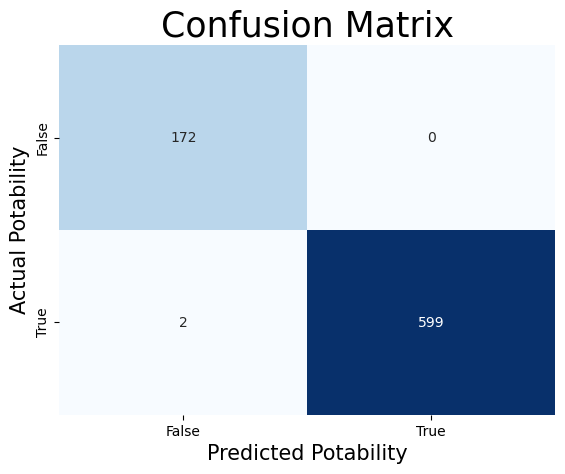

In [78]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

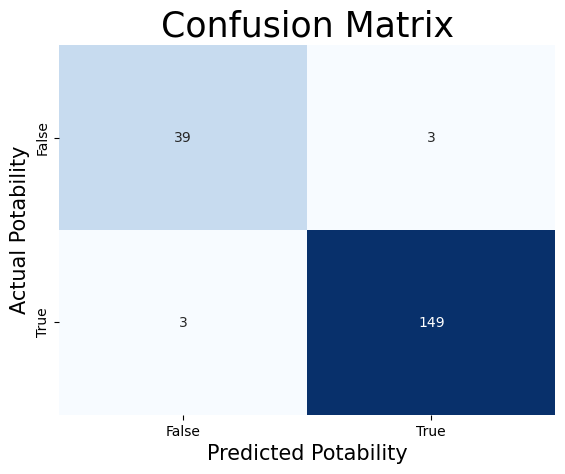

In [79]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [62]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
)
nn_model.fit(
    Xn,y_train,
    epochs=5439
)

Epoch 1/5439
25/25 [==============================] - 1s 3ms/step - loss: 0.6066
Epoch 2/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.5073
Epoch 3/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.4368
Epoch 4/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.3663
Epoch 5/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.3001
Epoch 6/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2398
Epoch 7/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 8/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1684
Epoch 9/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1476
Epoch 10/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 11/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1275
Epoch 12/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1176
Epoch 13/5439
25/25 [====

25/25 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 102/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 103/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 104/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0299
Epoch 105/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 106/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 107/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 108/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 109/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 110/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 111/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 112/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 113/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 298/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 299/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 300/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 301/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 302/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 303/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 304/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 305/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 306/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 307/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 308/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 309/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 494/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 495/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 496/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 497/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 498/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 499/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 500/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 501/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 502/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 503/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 504/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 505/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 690/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 691/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 692/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 693/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 694/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 695/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 696/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 697/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 698/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 699/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 700/5439
25/25 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 701/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 886/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 887/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 888/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 889/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 890/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 891/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 892/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 893/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 894/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 895/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 896/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 897/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 1081/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 1082/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 1083/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1084/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1085/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1086/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1087/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 1088/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1089/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 1090/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 1091/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 10

25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 1275/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 1276/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 1277/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 1278/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 1279/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 1280/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 1281/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 1282/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 1283/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 1284/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 1285/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 12

25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1469/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1470/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1471/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1472/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 1473/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1474/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1475/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1476/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1477/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1478/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1479/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 14

25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 1663/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 1664/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1665/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 1666/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 1667/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1668/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1669/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 1670/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 1671/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 1672/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 1673/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 16

25/25 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 1857/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 1858/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 1859/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1860/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 1861/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1862/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1863/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1864/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1865/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1866/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 1867/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 18

25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2051/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2052/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2053/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2054/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 2055/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 2056/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2057/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2058/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2059/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2060/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2061/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 20

25/25 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 2245/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 2246/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 2247/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2248/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2249/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2250/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 2251/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2252/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2253/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2254/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2255/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 22

25/25 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 2439/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 2440/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2441/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2442/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2443/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2444/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 2445/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 2446/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 2447/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2448/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 2449/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 24

25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2633/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2634/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2635/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2636/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2637/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2638/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2639/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2640/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2641/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 2642/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2643/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 26

25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2827/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2828/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2829/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2830/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2831/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 2832/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2833/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 2834/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2835/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2836/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2837/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 28

25/25 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 3021/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 3022/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 3023/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 3024/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3025/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 3026/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 3027/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3028/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3029/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 3030/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 3031/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 30

25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3215/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 3216/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 3217/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3218/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3219/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3220/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3221/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3222/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 3223/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3224/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3225/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 32

25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3409/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3410/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 3411/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3412/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3413/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3414/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 3415/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3416/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3417/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3418/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3419/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 34

25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3603/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3604/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3605/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 3606/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3607/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 3608/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 3609/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 3610/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 3611/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 3612/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 3613/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 36

25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3797/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3798/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 3799/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3800/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3801/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3802/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3803/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3804/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 3805/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3806/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 3807/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 38

25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3991/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3992/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3993/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3994/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3995/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3996/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3997/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3998/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3999/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4000/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4001/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 40

25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4185/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4186/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4187/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4188/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4189/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4190/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4191/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4192/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4193/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 4194/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4195/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 41

25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 4379/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 4380/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4381/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 4382/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4383/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4384/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4385/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4386/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4387/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4388/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4389/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 43

25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4573/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4574/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 4575/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4576/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4577/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 4578/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4579/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 4580/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4581/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 4582/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 4583/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 45

25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4767/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4768/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4769/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4770/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4771/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4772/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4773/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4774/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4775/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4776/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4777/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 47

25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4961/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4962/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4963/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4964/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4965/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4966/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4967/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4968/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4969/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4970/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4971/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 49

25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5155/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5156/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5157/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5158/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5159/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5160/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 5161/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 5162/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 5163/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5164/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5165/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 51

25/25 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 5349/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 5350/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 5351/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0363
Epoch 5352/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 5353/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 5354/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 5355/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 5356/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5357/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5358/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5359/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 53

In [63]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [64]:
acc_pred

0.979381443298969

In [65]:
acc_train

1.0

In [66]:
f1_pred

0.9868421052631579

In [67]:
f1_train

1.0

In [68]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

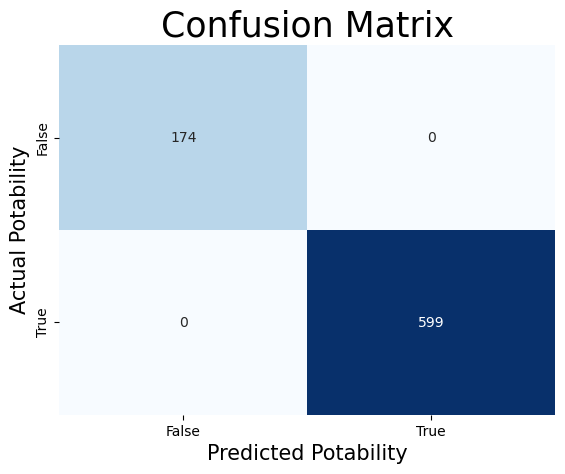

In [69]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

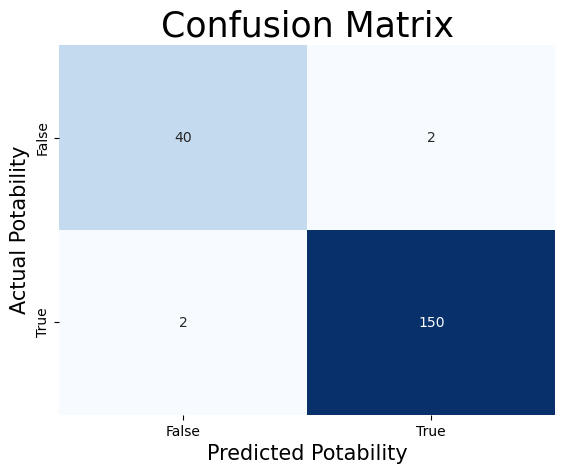

In [70]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [62]:
lamda = 0.0001
nn_model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda)),
        Dense(1, activation='linear')            
    ]
)
nn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
)
nn_model.fit(
    Xn,y_train,
    epochs=1000
)

Epoch 1/5439
25/25 [==============================] - 1s 3ms/step - loss: 0.6066
Epoch 2/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.5073
Epoch 3/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.4368
Epoch 4/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.3663
Epoch 5/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.3001
Epoch 6/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2398
Epoch 7/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 8/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1684
Epoch 9/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1476
Epoch 10/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 11/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.1275
Epoch 12/5439
25/25 [==============================] - 0s 2ms/step - loss: 0.1176
Epoch 13/5439
25/25 [====

25/25 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 102/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 103/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 104/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0299
Epoch 105/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 106/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 107/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 108/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 109/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 110/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 111/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 112/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 113/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 298/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 299/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 300/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 301/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 302/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 303/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 304/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 305/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 306/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 307/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 308/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 309/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 494/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 495/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 496/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 497/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 498/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 499/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 500/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 501/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 502/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 503/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 504/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 505/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 690/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 691/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 692/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 693/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 694/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 695/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 696/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 697/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 698/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 699/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 700/5439
25/25 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 701/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 886/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 887/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 888/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 889/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 890/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 891/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 892/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 893/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 894/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 895/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 896/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 897/5439
25/2

25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 1081/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 1082/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 1083/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1084/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1085/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1086/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1087/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 1088/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1089/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 1090/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 1091/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 10

25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 1275/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 1276/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 1277/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 1278/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 1279/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 1280/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 1281/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 1282/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 1283/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 1284/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 1285/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 12

25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1469/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1470/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1471/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1472/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 1473/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1474/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1475/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1476/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 1477/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1478/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1479/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 14

25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 1663/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 1664/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1665/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 1666/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 1667/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1668/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1669/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 1670/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 1671/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 1672/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 1673/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 16

25/25 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 1857/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 1858/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 1859/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1860/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 1861/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1862/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1863/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1864/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 1865/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 1866/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 1867/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 18

25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2051/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2052/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2053/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2054/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 2055/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 2056/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2057/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2058/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2059/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2060/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2061/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 20

25/25 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 2245/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 2246/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 2247/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2248/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2249/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2250/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 2251/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2252/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2253/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2254/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2255/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 22

25/25 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 2439/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 2440/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 2441/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2442/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2443/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2444/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 2445/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 2446/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 2447/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2448/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 2449/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 24

25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2633/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2634/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2635/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2636/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2637/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2638/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2639/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2640/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2641/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 2642/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2643/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 26

25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2827/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2828/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2829/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2830/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2831/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 2832/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2833/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 2834/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2835/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2836/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2837/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 28

25/25 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 3021/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 3022/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 3023/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 3024/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3025/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 3026/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 3027/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3028/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3029/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 3030/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 3031/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 30

25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3215/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 3216/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 3217/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3218/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3219/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3220/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3221/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3222/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 3223/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3224/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3225/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 32

25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3409/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3410/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 3411/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3412/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3413/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3414/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 3415/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3416/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3417/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3418/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 3419/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 34

25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3603/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3604/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3605/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 3606/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3607/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 3608/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 3609/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 3610/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 3611/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 3612/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 3613/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 36

25/25 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3797/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3798/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 3799/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3800/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3801/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3802/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3803/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3804/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 3805/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3806/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 3807/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 38

25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3991/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3992/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3993/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3994/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3995/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3996/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3997/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3998/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3999/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4000/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4001/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 40

25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4185/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4186/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4187/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4188/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4189/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4190/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4191/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4192/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4193/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 4194/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4195/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 41

25/25 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 4379/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 4380/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4381/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 4382/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4383/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4384/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4385/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4386/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4387/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4388/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4389/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 43

25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4573/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4574/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 4575/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4576/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4577/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 4578/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4579/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 4580/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4581/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 4582/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 4583/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 45

25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4767/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4768/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4769/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4770/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4771/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4772/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4773/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4774/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4775/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4776/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4777/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 47

25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4961/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4962/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4963/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4964/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4965/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 4966/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4967/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4968/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4969/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4970/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4971/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 49

25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5155/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5156/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5157/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5158/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5159/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5160/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 5161/5439
25/25 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 5162/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 5163/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5164/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5165/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 51

25/25 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 5349/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 5350/5439
25/25 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 5351/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0363
Epoch 5352/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 5353/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 5354/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 5355/5439
25/25 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 5356/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5357/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5358/5439
25/25 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5359/5439
25/25 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 53

In [63]:
yhat_pred = nn_model.predict(norm(X_val))
yhat_pred = tf.math.sigmoid(yhat_pred)
yhat_pred = yhat_pred >= 0.5

acc_pred = accuracy_score(y_val,yhat_pred)
f1_pred = f1_score(y_val,yhat_pred)

yhat_train = nn_model.predict(norm(X_train))
yhat_train = tf.math.sigmoid(yhat_train)
yhat_train = yhat_train >= 0.5

acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

25/25 [==============================] - 0s 3ms/step


In [64]:
acc_pred

0.979381443298969

In [65]:
acc_train

1.0

In [66]:
f1_pred

0.9868421052631579

In [67]:
f1_train

1.0

In [68]:
yhat_pred

<tf.Tensor: shape=(194, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ 

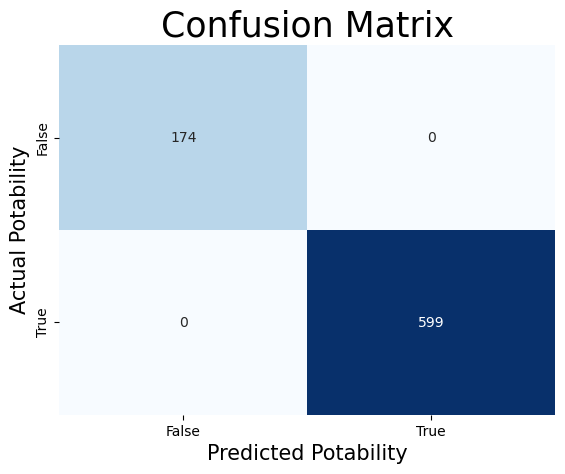

In [69]:
cf_matrix = confusion_matrix(yhat_train,y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

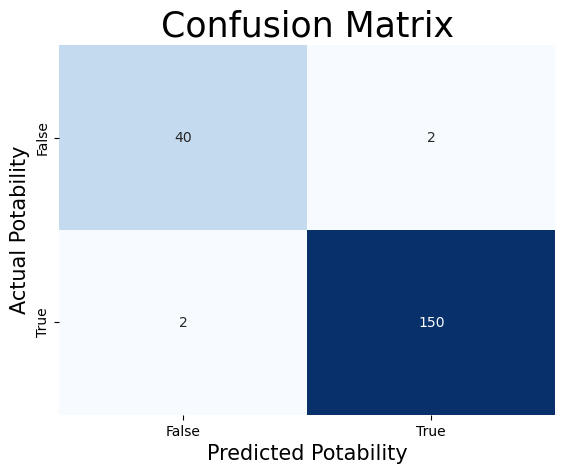

In [70]:
cf_matrix = confusion_matrix(yhat_pred,y_val)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

##### Dumping prediction model

In [ ]:
# import joblib

In [ ]:
# joblib.dump(xgb_model,'model.sav')